# **Series de Fourier**

In [1]:
import numpy as np
import matplotlib.pylab as plt

from scipy import signal as sp
# Importamos todo el modulo sympy
from sympy import *
# Importamos las variables simbolicas 'n' y 't'
from sympy.abc import n, t

Text(0.5, 0, 'Time(t)')

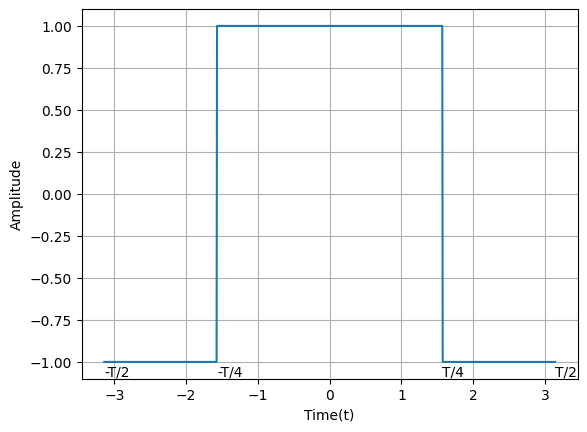

In [2]:
# Periodo
T = 2*np.pi
# Frecuencia angular
w = (2*np.pi)/T

ft = Piecewise((-1,t <-T/2),
                   (-1,t <-T/4),
                   ( 1,t < T/4),
                   (-1,t < T/2),
                   (-1,True),)

a = -T/2
b = T/2
muestras = 1000
time = np.linspace(a, b, muestras)

ftn = lambdify(t, ft)
squareWaveFunction = ftn(time)

# Graficamos la onda cuadrada
plt.plot(time, squareWaveFunction, label = 'f(t)')
plt.grid()
plt.annotate('-T/2', xy = (-np.pi, -1), xytext = (-np.pi, -1.08))
plt.annotate('-T/4', xy = (-np.pi/2.0, -1), xytext = (-np.pi/2.0, -1.08))
plt.annotate('T/4', xy = (np.pi/2.0, -1), xytext = (np.pi/2.0, -1.08))
plt.annotate('T/2', xy = (np.pi, -1), xytext = (np.pi, -1.08))
plt.ylabel('Amplitude')
plt.xlabel('Time(t)')

### La función que representa la señal cuadrada, esta definida de la siguiente manera:

<center><image src="Picture1.PNG" alt="Functions that are defined piecewise"></center>

#### La formula de los coeficientes esta dada por:

<center><image src="Picture5.PNG" alt="Functions that are defined piecewise"></center>

* **Calculamos los coeficientes usando sympy.**

In [3]:
# Integramos la funcion (2/T) cuya variable es 't'
# en cada uno de los valores de la funcion comprendida entre -T/2 y T/2.
ao1 = integrate(-1, (t, -T/2, -T/4))
ao2 = integrate(1, (t, -T/4, T/4))
ao3 = integrate(-1, (t, T/4, T/2))
ao = (2/T)*(ao1 + ao2 + ao3)

print("a0 = ")
pprint(ao)

# Integramos la funcion (2/T)*cos(nwt) 
# Su variable es 't' y sus limites de integracion estan entre -T/2 y T/2.
an1 = integrate(-1*cos(n*w*t), (t, -T/2, -T/4))
an2 = integrate(1*cos(n*w*t), (t, -T/4, T/4))
an3 = integrate(-1*cos(n*w*t), (t, T/4, T/2))
an = (2/T)*(an1 + an2 + an3)

print("an = ")
pprint(an)

# Integramos la funcion (2/T*sin(nwt)
# Su variable es 't' y sus limites de integracion estan entre -T/2 y T/2. 
bn1 = integrate(-1*sin(n*w*t), (t, -T/2, -T/4))
bn2 = integrate(1*sin(n*w*t), (t, -T/4, T/4))
bn3 = integrate(-1*sin(n*w*t), (t, T/4, T/2))
bn = (2/T)*(bn1 + bn2 + bn3)

print("bn = ")
pprint(bn)

a0 = 
0
an = 
                  ⎛⎧2.0⋅sin(1.5707963267949⋅n)                            ⎞   
                  ⎜⎪──────────────────────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0⎟   
0.318309886183791⋅⎜⎨            n                                         ⎟ + 
                  ⎜⎪                                                      ⎟   
                  ⎝⎩     3.14159265358979               otherwise         ⎠   

                  ⎛⎧1.0⋅sin(1.5707963267949⋅n)   sin(3.14159265358979⋅n)      
                  ⎜⎪────────────────────────── - ───────────────────────  for 
0.636619772367581⋅⎜⎨            n                           n                 
                  ⎜⎪                                                          
                  ⎝⎩                  -1.5707963267949                        

                      ⎞
n > -∞ ∧ n < ∞ ∧ n ≠ 0⎟
                      ⎟
                      ⎟
    otherwise         ⎠
bn = 
                  ⎛⎧  cos(1.5707963267949⋅n)   1.0⋅cos(3.14159265358

* **Calculamos la serie basada en la cantidad de coeficientes.**

In [4]:
print(t)
print(w)

print( "f(x) = ")

nCoeficientes = 8
serie = (ao/2)
for i in range(1, nCoeficientes + 1):
    serie = serie + (an*cos(n*w*t)).subs(n, i)
for j in range(1, nCoeficientes + 1):
    serie = serie + (bn*sin(n*w*t)).subs(n, j)

pprint(serie)

t
1.0
f(x) = 
1.27323954473516⋅cos(1.0⋅t) + 1.55926873300775e-16⋅cos(2.0⋅t) - 0.424413181578
388⋅cos(3.0⋅t) + 0.254647908947032⋅cos(5.0⋅t) + 1.55926873300775e-16⋅cos(6.0⋅t
) - 0.181891363533595⋅cos(7.0⋅t)


* **Graficamos cada serie de forma individual contra el time**

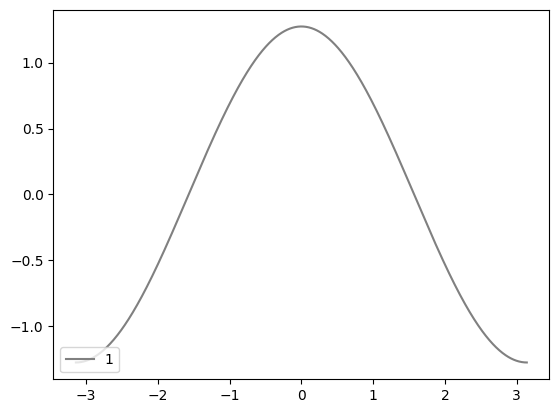

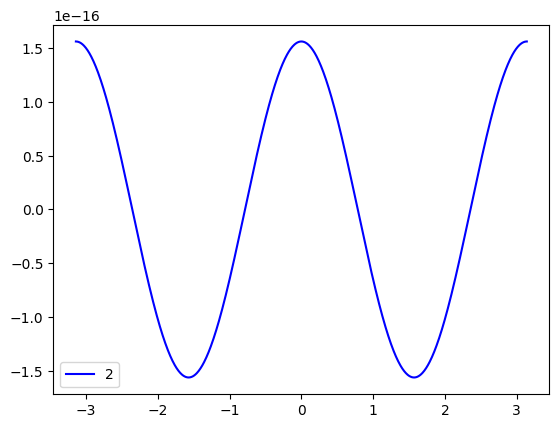

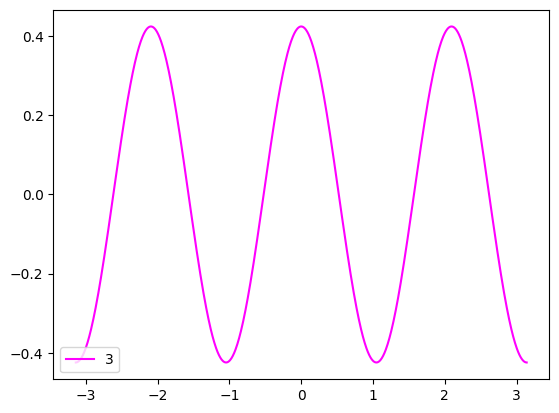

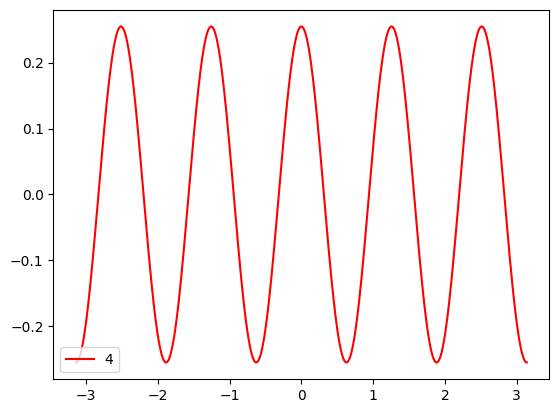

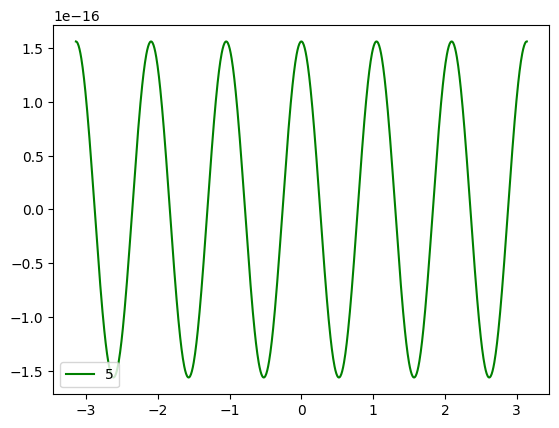

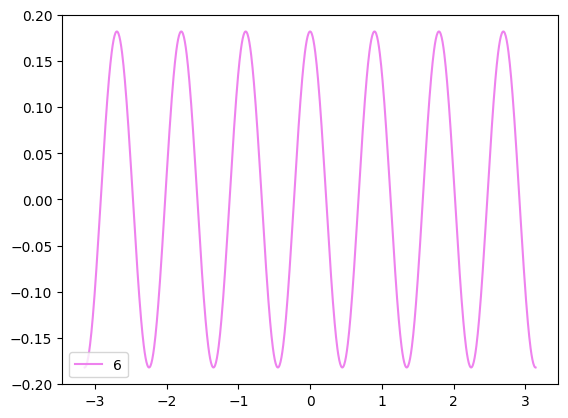

In [5]:
plt.figure()
serie1 = (1.27323954473516*np.cos(1*time))
plt.plot(time, serie1, 'grey', label = '1')
plt.legend(loc = "lower left")

plt.figure()
serie2 = (1.55926873300775*10**-16*np.cos(2*time))
plt.plot(time, serie2, 'blue', label = '2')
plt.legend(loc = "lower left")

plt.figure()
serie3 = (0.424413181578388*np.cos(3*time))
plt.plot(time, serie3, 'magenta', label = '3')
plt.legend(loc = "lower left")

plt.figure()
serie4 = (0.254647908947032*np.cos(5*time))
plt.plot(time, serie4, 'red', label = '4')
plt.legend(loc = "lower left")

plt.figure()
serie5 = (1.55926873300775*10**-16*np.cos(6*time))
plt.plot(time, serie5, 'green', label = '5')
plt.legend(loc = "lower left")

plt.figure()
serie6 = (0.181891363533595*np.cos(7*time))
plt.plot(time, serie6, 'violet', label = '6')
plt.legend(loc = "lower left")

#plt.figure()
#serieFourier = serie1 + serie2 - serie3 + serie4 + serie5 - serie6 
#plt.plot(ti, serieFourier, 'orange')

* **Graficamos la serie de fourier**

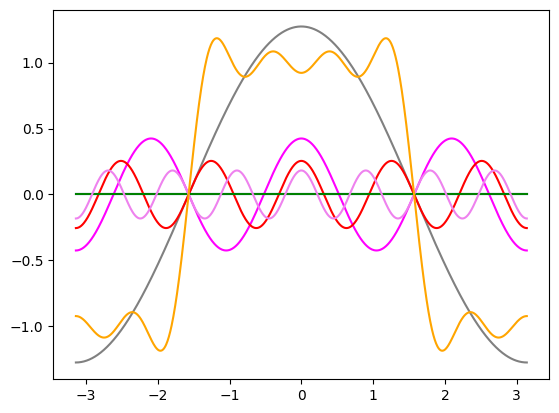

In [6]:
serie1 = (1.27323954473516*np.cos(1*time))
plt.plot(time, serie1, 'grey', label = '1')

serie2 = (1.55926873300775*10**-16*np.cos(2*time))
plt.plot(time, serie2, 'blue', label = '2')

serie3 = (0.424413181578388*np.cos(3*time))
plt.plot(time, serie3, 'magenta', label = '3')

serie4 = (0.254647908947032*np.cos(5*time))
plt.plot(time, serie4, 'red', label = '4')

serie5 = (1.55926873300775*10**-16*np.cos(6*time))
plt.plot(time, serie5, 'green', label = '5')

serie6 = (0.181891363533595*np.cos(7*time))
plt.plot(time, serie6, 'violet', label = '6')

serieFourier = serie1 + serie2 - serie3 + serie4 + serie5 - serie6 
plt.plot(time, serieFourier, 'orange')

* **Graficamos la serie de fourier y la función de onda cuadrada**

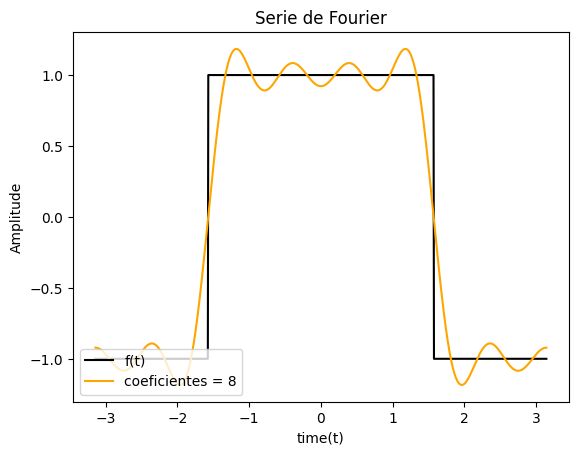

In [7]:
plt.plot(time, squareWaveFunction, 'black', label = 'f(t)')
etiqueta = 'coeficientes = '+ str(nCoeficientes)
plt.plot(time, serieFourier, 'orange', label = etiqueta)
plt.title('Serie de Fourier')
plt.xlabel('time(t)')
plt.ylabel('Amplitude')
plt.legend(loc = "lower left")